## Importing & Reading the Data as CSV

In [4]:
df <- read.csv("C:/Users/RAGHUL/Desktop/GRE-Quants/assignment.csv")

In [6]:
head(df)

Instructor,Grade,Words_per_minute,Proofreading,Spreadsheet,Statistics
Dr. Katz,6,35,53,75,61
Dr. Katz,6,50,77,24,51
Dr. Katz,6,55,71,62,55
Dr. Katz,6,60,78,27,91
Dr. Katz,6,65,84,44,95
Dr. Katz,6,60,79,38,50


### Plotting Words_per_minute along x axis and Proofreading along y axis

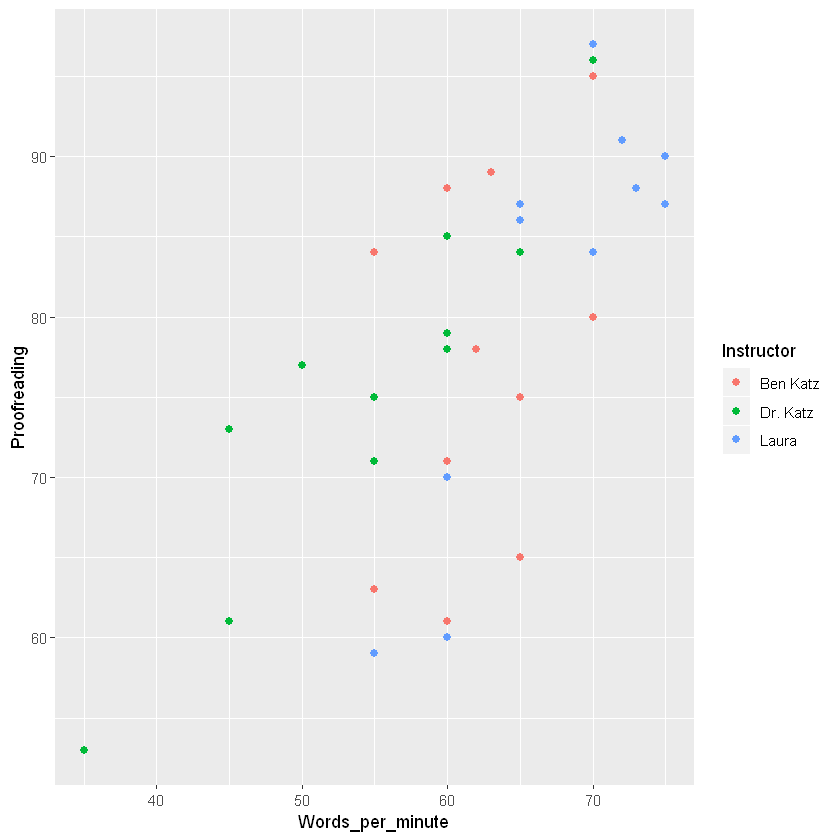

In [18]:
ggplot(data=df, aes(x=Words_per_minute, y=Proofreading, color=Instructor)) + geom_point(size=2)

## Removing Non Numerical Variables

In [7]:
df_num <- (df[,-1])
df_num

Grade,Words_per_minute,Proofreading,Spreadsheet,Statistics
6,35,53,75,61
6,50,77,24,51
6,55,71,62,55
6,60,78,27,91
6,65,84,44,95
6,60,79,38,50
6,70,96,12,94
6,45,73,59,75
6,55,75,55,80
6,60,85,35,84


# Correlation Matrix

#### Each variable is compared to every other variable and correlation is obtained

In [8]:
matrix_corr <- cor(df_num)
matrix_corr

,Grade,Words_per_minute,Proofreading,Spreadsheet,Statistics
Grade,1.000000000,0.31646804,0.006126351,-0.02452209,0.07634421
Words_per_minute,0.316468043,1.00000000,0.714108693,-0.60642223,-0.07332261
Proofreading,0.006126351,0.71410869,1.000000000,-0.79000031,-0.11842885
Spreadsheet,-0.024522089,-0.60642223,-0.790000313,1.00000000,0.11527712
Statistics,0.076344214,-0.07332261,-0.118428851,0.11527712,1.00000000


#### Picking the Two Most Correlated Variables

In [9]:
for (i in 1:nrow(matrix_corr)){
  correlations <-  which((matrix_corr[i,] > 0.50) & (matrix_corr[i,] != 1))
  
  if(length(correlations)> 0){
    print(colnames(df_num)[i])
    print(correlations)
  }
}

[1] "Words_per_minute"
Proofreading 
           3 
[1] "Proofreading"
Words_per_minute 
               2 


# Plotting the Correlation Matrix in the form of Ellipse

Warning message:
"package 'corrplot' was built under R version 3.6.2"corrplot 0.84 loaded


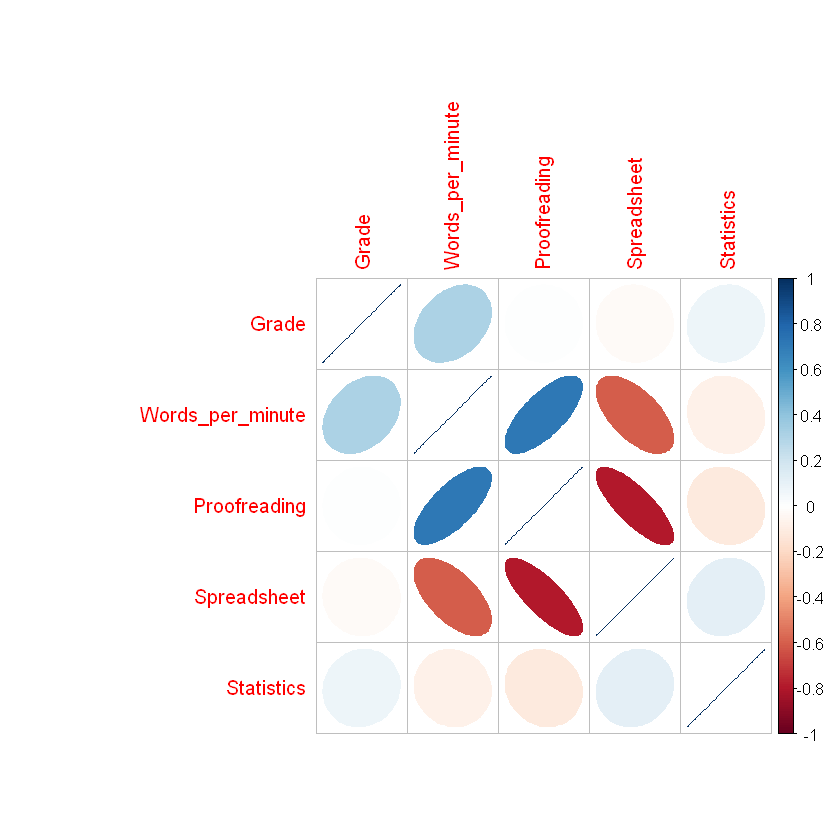

In [11]:
library(corrplot)
corrplot(matrix_corr, method = "ellipse")

## Correlation Coeffecient of Different Methods

In [12]:
result <- cor.test(df_num$Spreadsheet, df_num$Proofreading, method ="pearson")
result2 <- cor.test(df_num$Spreadsheet, df_num$Proofreading, method ="kendall")
result3 <- cor.test(df_num$Spreadsheet, df_num$Proofreading, method ="spearman")

Warning message in cor.test.default(df_num$Spreadsheet, df_num$Proofreading, method = "kendall"):
"Cannot compute exact p-value with ties"Warning message in cor.test.default(df_num$Spreadsheet, df_num$Proofreading, method = "spearman"):
"Cannot compute exact p-value with ties"

In [13]:
result$estimate
result2$estimate
result3$estimate

cor 
-0.7900003

tau 
-0.5714288

rho 
-0.7430736

## Linear Model with Words_per_minute in y axis and Proofreading in x axis

In [15]:
model <- lm(df_num$Words_per_minute ~ df_num$Proofreading)
summary(model)


Call:
lm(formula = df_num$Words_per_minute ~ df_num$Proofreading)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6190  -3.3739  -0.4201   4.5995  10.6723 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         19.46080    7.21690   2.697   0.0109 *  
df_num$Proofreading  0.53641    0.09154   5.860 1.46e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.324 on 33 degrees of freedom
Multiple R-squared:   0.51,	Adjusted R-squared:  0.4951 
F-statistic: 34.34 on 1 and 33 DF,  p-value: 1.457e-06


### By Observing the Below Plots, we can conclude that the data is non linear and thus, the linear model could not fit properly 

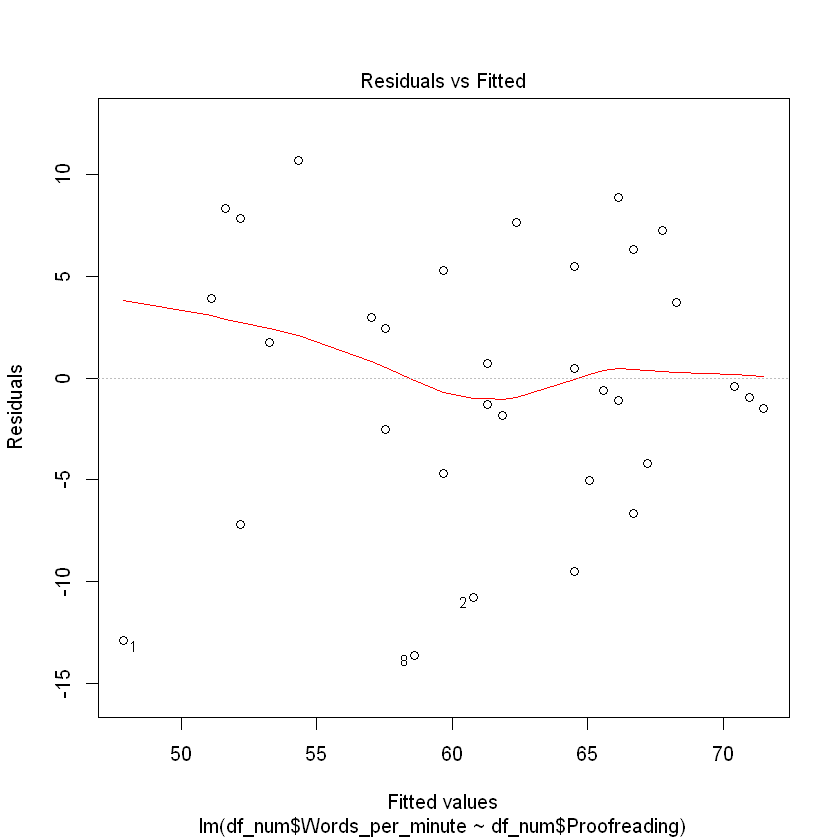

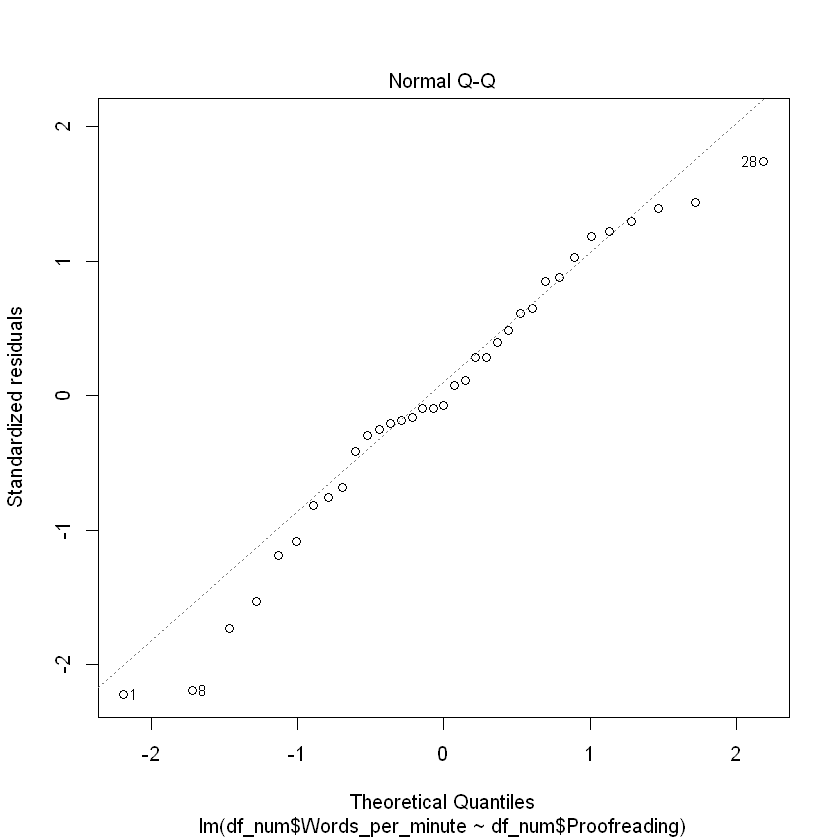

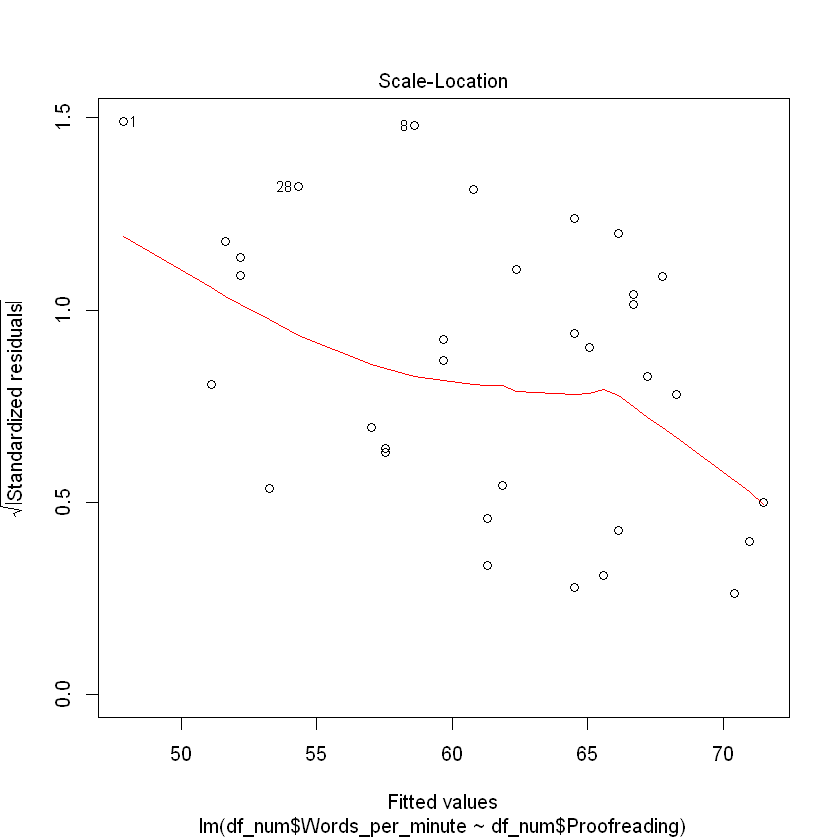

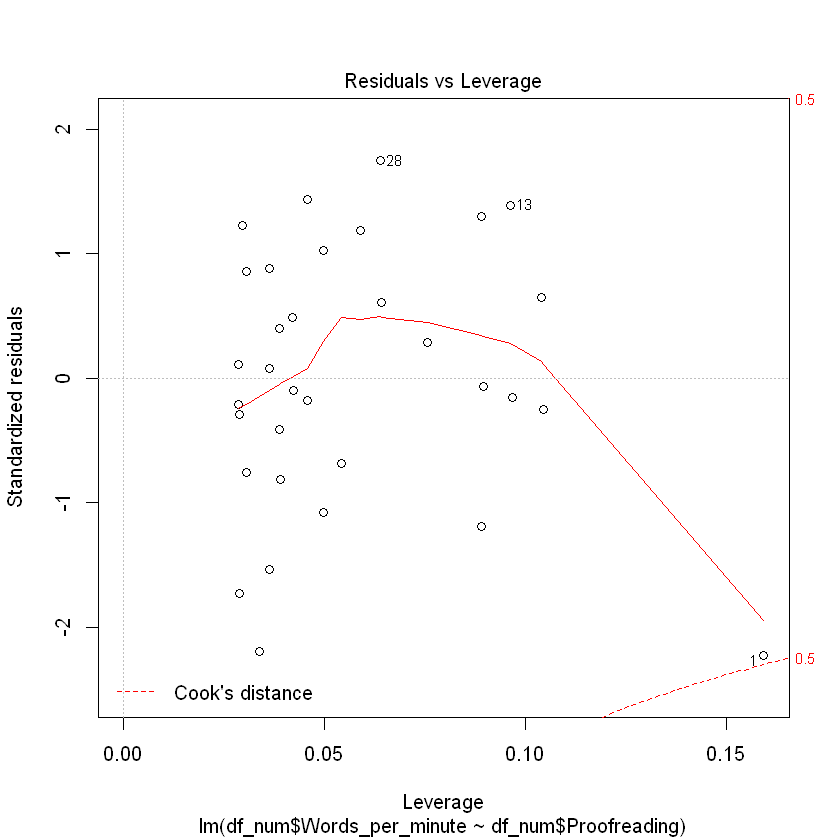

In [17]:
plot(model)